<a href="https://colab.research.google.com/github/MuhammadNurilHuda/MachineLearningProject/blob/main/Diabetic_foot_thermogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early detection of diabetic foot using thermograms

## Modul 1 & 2

### Load data

In [ ]:
!wget -O Dataset.zip https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset.zip?raw=true

--2021-11-07 16:09:23--  https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MuhammadNurilHuda/MachineLearningProject/raw/main/Dataset.zip [following]
--2021-11-07 16:09:23--  https://github.com/MuhammadNurilHuda/MachineLearningProject/raw/main/Dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MuhammadNurilHuda/MachineLearningProject/main/Dataset.zip [following]
--2021-11-07 16:09:24--  https://raw.githubusercontent.com/MuhammadNurilHuda/MachineLearningProject/main/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuser

In [ ]:
!rm -r /content/Dataset

rm: cannot remove '/content/Dataset': No such file or directory


In [ ]:
import zipfile, os

local_zip = '/content/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
base_dir = '/content/Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_positif_dir = os.path.join(train_dir, 'Positif')
train_negatif_dir = os.path.join(train_dir, 'Negatif')

validation_positif_dir = os.path.join(validation_dir, 'Positif')
validation_negatif_dir = os.path.join(validation_dir, 'Negatif')

In [ ]:
positif_dir = os.path.join(base_dir, 'Positif')
negatif_dir = os.path.join(base_dir, 'Negatif')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

os.mkdir(train_positif_dir)
os.mkdir(train_negatif_dir)

os.mkdir(validation_positif_dir)
os.mkdir(validation_negatif_dir)

### Split data

In [ ]:
from sklearn.model_selection import train_test_split

train_positif, val_positif = train_test_split(os.listdir(positif_dir), test_size = 0.3)
train_negatif, val_negatif = train_test_split(os.listdir(negatif_dir), test_size = 0.3)

In [ ]:
import shutil

for f in train_positif:
  shutil.copy(os.path.join(positif_dir, f), os.path.join(train_positif_dir, f))

for f in train_negatif:
  shutil.copy(os.path.join(negatif_dir, f), os.path.join(train_negatif_dir, f))

for f in val_positif:
  shutil.copy(os.path.join(positif_dir, f), os.path.join(validation_positif_dir, f))

for f in val_negatif:
  shutil.copy(os.path.join(negatif_dir, f), os.path.join(validation_negatif_dir, f))

In [ ]:
print('total training positif images:', len(os.listdir(train_positif_dir)))
print('total training negatif images:', len(os.listdir(train_negatif_dir)))
print('total validation positif images:', len(os.listdir(validation_positif_dir)))
print('total validation negatif images:', len(os.listdir(validation_negatif_dir)))

total training positif images: 85
total training negatif images: 31
total validation positif images: 37
total validation negatif images: 14


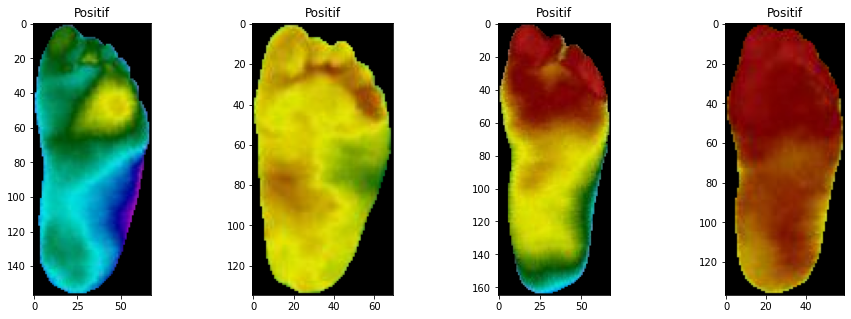

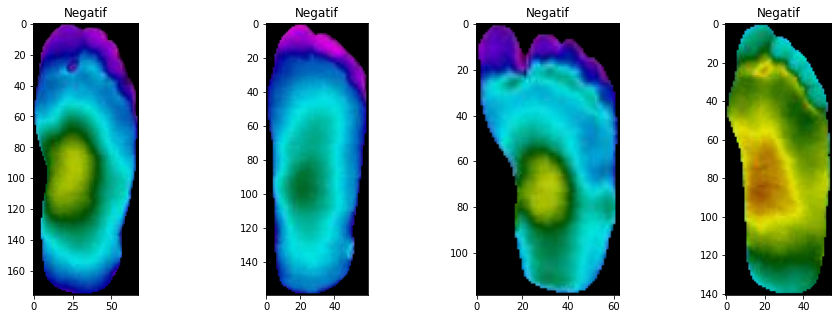

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 5))
for i, img_path in enumerate(train_positif[:4]):
    sp = plt.subplot(1,5,i+1)
    img = mpimg.imread(os.path.join(positif_dir, img_path))
    plt.title('Positif')
    plt.imshow(img)
plt.show()

plt.figure(figsize=(20, 5))
for i, img_path in enumerate(train_negatif[:4]):
    sp = plt.subplot(1,5,i+1)
    img = mpimg.imread(os.path.join(negatif_dir, img_path))
    plt.title('Negatif')
    plt.imshow(img)
plt.show()

### Augmentasi data

In [ ]:
# Augmentasi data
# https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator (
    rescale = 1./255, # mwngubah ukuran gambar
    rotation_range = 20, # merotasi gambar
    horizontal_flip = True, # membalik gambar secara horizontal
    shear_range = 0.2, # 
    fill_mode = 'nearest' # default
)

In [ ]:
train_generator = datagen.flow_from_directory (
    train_dir,
    target_size=(100,100),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator = datagen.flow_from_directory (
    validation_dir,
    target_size=(100,100),
    batch_size = 32,
    class_mode = 'binary'
)

Found 116 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


### Preprocessing

In [ ]:
import numpy as np

np.unique(train_generator.classes, return_counts=True)

(array([0, 1], dtype=int32), array([31, 85]))

In [ ]:
np.unique(val_generator.classes, return_counts=True)

(array([0, 1], dtype=int32), array([14, 37]))

### Modeling using ANN

In [ ]:
import tensorflow as tf

model_ann = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100,100,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1920064   
_________________________________________________________________
dense_1 (Dense)              (None, 72)                4680      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                5840      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 1,930,665
Trainable params: 1,930,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model_ann.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

In [ ]:
history_ann = model_ann.fit(train_generator, batch_size=32, epochs=100, validation_data=val_generator)

Epoch 1/100
4/4 [==============================] - 2s 229ms/step - loss: 0.5228 - acc: 0.6379 - val_loss: 0.4875 - val_acc: 0.7255
Epoch 2/100
4/4 [==============================] - 1s 165ms/step - loss: 0.3926 - acc: 0.7759 - val_loss: 0.4714 - val_acc: 0.7255
Epoch 3/100
4/4 [==============================] - 1s 170ms/step - loss: 0.3509 - acc: 0.7931 - val_loss: 0.4780 - val_acc: 0.7843
Epoch 4/100
4/4 [==============================] - 1s 169ms/step - loss: 0.3449 - acc: 0.8276 - val_loss: 0.4606 - val_acc: 0.6863
Epoch 5/100
4/4 [==============================] - 1s 169ms/step - loss: 0.3283 - acc: 0.8276 - val_loss: 0.5010 - val_acc: 0.6863
Epoch 6/100
4/4 [==============================] - 1s 182ms/step - loss: 0.3160 - acc: 0.8362 - val_loss: 0.5426 - val_acc: 0.7647
Epoch 7/100
4/4 [==============================] - 1s 180ms/step - loss: 0.2977 - acc: 0.8707 - val_loss: 0.5095 - val_acc: 0.7451
Epoch 8/100
4/4 [==============================] - 1s 167ms/step - loss: 0.2680 - a

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

pred = model_ann.predict(val_generator)
labels = (pred > 0.5).astype(np.int)

### Plotting

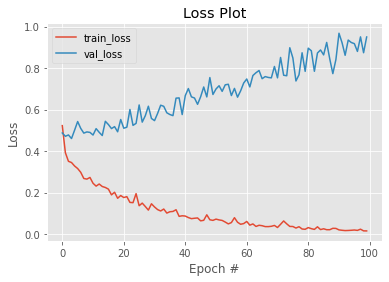

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history_ann.history["loss"], label="train_loss")
plt.plot(history_ann.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

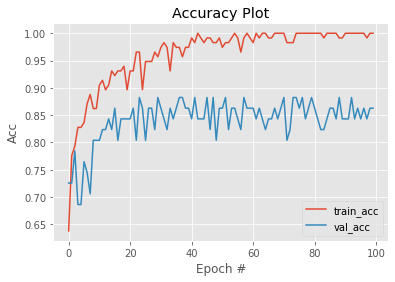

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history_ann.history["acc"], label="train_acc")
plt.plot(history_ann.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
print("model ANN")
print(classification_report(val_generator.classes, labels))

model ANN
              precision    recall  f1-score   support

           0       0.36      0.29      0.32        14
           1       0.75      0.81      0.78        37

    accuracy                           0.67        51
   macro avg       0.56      0.55      0.55        51
weighted avg       0.64      0.67      0.65        51



### Modeling using CNN

In [ ]:
# https://wandb.ai/ayush-thakur/dl-question-bank/reports/Keras-Input-Explanation-input_shape-units-batch_size-dim-etc--VmlldzoyMDIzMDU

import tensorflow as tf

model_cnn_1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100,100,3)),
    tf.keras.layers.Conv2D(8, (3,3), activation='relu'), # 2D Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), # Max pooling operation for 2D spatial data
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # Flattens the input. Does not affect the batch size
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       18560     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)            

In [ ]:
from tensorflow.keras.optimizers import Adam

model_cnn_1.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True)

history= model_cnn_1.fit(
    train_generator,
    batch_size=32,
    epochs=100,
    validation_data=val_generator,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100
4/4 [==============================] - 2s 449ms/step - loss: 0.6053 - accuracy: 0.7241 - val_loss: 0.5566 - val_accuracy: 0.7255

Epoch 00001: val_loss improved from inf to 0.55660, saving model to model.h5
Epoch 2/100
4/4 [==============================] - 2s 351ms/step - loss: 0.5311 - accuracy: 0.7328 - val_loss: 0.5314 - val_accuracy: 0.7255

Epoch 00002: val_loss improved from 0.55660 to 0.53141, saving model to model.h5
Epoch 3/100
4/4 [==============================] - 1s 335ms/step - loss: 0.4874 - accuracy: 0.7328 - val_loss: 0.5005 - val_accuracy: 0.7255

Epoch 00003: val_loss improved from 0.53141 to 0.50049, saving model to model.h5
Epoch 4/100
4/4 [==============================] - 1s 354ms/step - loss: 0.4394 - accuracy: 0.7500 - val_loss: 0.4707 - val_accuracy: 0.7059

Epoch 00004: val_loss improved from 0.50049 to 0.47065, saving model to model.h5
Epoch 5/100
4/4 [==============================] - 1s 351ms/step - loss: 0.4266 - accuracy: 0.7672 - val_loss: 0

In [ ]:
score = model_cnn_1.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))


4/4 [==============================] - 1s 123ms/step - loss: 0.0875 - accuracy: 0.9828
Loss: 0.09
Accuracy: 0.98


In [ ]:
score = model_cnn_1.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 0s 43ms/step - loss: 0.4599 - accuracy: 0.8824
Loss: 0.46
Accuracy: 0.88


In [ ]:
model_cnn_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100,100,3)),
    tf.keras.layers.Conv2D(72, (3,3), activation='relu'), # 2D Convolutional layer
    tf.keras.layers.MaxPooling2D(2,2), # Max pooling operation for 2D spatial data
    tf.keras.layers.Conv2D(80, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # Flattens the input. Does not affect the batch size
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 72)        2016      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 72)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 80)        51920     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 80)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 42320)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               10834176  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
model_cnn_2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

callbacks2 = tf.keras.callbacks.ModelCheckpoint(filepath='model2.h5', verbose=1, save_best_only=True)

history= model_cnn_2.fit(
    train_generator,
    batch_size=32,
    epochs=100,
    validation_data=val_generator,
    verbose=1,
    callbacks=callbacks2
)

Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 0.6160 - accuracy: 0.5603 - val_loss: 0.4797 - val_accuracy: 0.7255

Epoch 00001: val_loss improved from inf to 0.47970, saving model to model2.h5
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.4359 - accuracy: 0.7500 - val_loss: 0.4687 - val_accuracy: 0.7059

Epoch 00002: val_loss improved from 0.47970 to 0.46871, saving model to model2.h5
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.3965 - accuracy: 0.7672 - val_loss: 0.4601 - val_accuracy: 0.7255

Epoch 00003: val_loss improved from 0.46871 to 0.46009, saving model to model2.h5
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 0.3758 - accuracy: 0.7759 - val_loss: 0.4682 - val_accuracy: 0.7451

Epoch 00004: val_loss did not improve from 0.46009
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.3724 - accuracy: 0.8190 - val_loss: 0.4783 - val_accuracy: 0.7255

Epoch 00005:

In [ ]:
score = model_cnn_2.evaluate(train_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

4/4 [==============================] - 1s 247ms/step - loss: 0.0157 - accuracy: 1.0000
Loss: 0.02
Accuracy: 1.00


In [ ]:
score = model_cnn_2.evaluate(val_generator)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 1s 147ms/step - loss: 1.0251 - accuracy: 0.8627
Loss: 1.03
Accuracy: 0.86


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

pred = model_cnn_1.predict(val_generator)
labels = (pred > 0.5).astype(np.int)

pred2 = model_cnn_2.predict(val_generator)
labels2 = (pred2 > 0.5).astype(np.int)

In [ ]:
print("model 1")
print(classification_report(val_generator.classes, labels))
print("model 2")
print(classification_report(val_generator.classes, labels2))

model 1
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.78      0.86      0.82        37

    accuracy                           0.73        51
   macro avg       0.64      0.61      0.62        51
weighted avg       0.70      0.73      0.71        51

model 2
              precision    recall  f1-score   support

           0       0.20      0.14      0.17        14
           1       0.71      0.78      0.74        37

    accuracy                           0.61        51
   macro avg       0.45      0.46      0.46        51
weighted avg       0.57      0.61      0.59        51



## Modul 3

### CNN with Overfitting Handling

### Load Data

In [ ]:
!wget -O Dataset2.zip https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset2.zip?raw=true

--2021-11-08 04:38:05--  https://github.com/MuhammadNurilHuda/MachineLearningProject/blob/main/Dataset2.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MuhammadNurilHuda/MachineLearningProject/raw/main/Dataset2.zip [following]
--2021-11-08 04:38:05--  https://github.com/MuhammadNurilHuda/MachineLearningProject/raw/main/Dataset2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MuhammadNurilHuda/MachineLearningProject/main/Dataset2.zip [following]
--2021-11-08 04:38:06--  https://raw.githubusercontent.com/MuhammadNurilHuda/MachineLearningProject/main/Dataset2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [ ]:
import zipfile, os

local_zip = '/content/Dataset2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Dataset2')
zip_ref.close()

In [ ]:
!mv /content/Dataset2/Dataset/Negatif /content/Dataset2

In [ ]:
!mv /content/Dataset2/Dataset/Positif /content/Dataset2

In [ ]:
!rm -r /content/Dataset2/Dataset

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('/content/Dataset2', output="Dataset2_split", seed=42, ratio=(.8, .19, .01), group_prefix=None)

Copying files: 334 files [00:00, 6400.91 files/s]


In [ ]:
import os
base_dir = '/content/Dataset2_split'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_positif = os.path.join(train_dir, 'Positif')
train_negatif = os.path.join(train_dir, 'Negatif')

In [ ]:
val_positif = os.path.join(val_dir, 'Positif')
val_negatif = os.path.join(val_dir, 'Negatif')

In [ ]:
test_positif = os.path.join(test_dir, 'Positif')
test_negatif = os.path.join(test_dir, 'Negatif')

In [ ]:
print('total training positif images:', len(os.listdir(train_positif)))
print('total training negatif images:', len(os.listdir(train_negatif)))

total training positif images: 195
total training negatif images: 72


In [ ]:
print('total validation positif images:', len(os.listdir(val_positif)))
print('total validation negatif images:', len(os.listdir(val_negatif)))

total validation positif images: 46
total validation negatif images: 17


In [ ]:
print('total test positif images:', len(os.listdir(test_positif)))
print('total test negatif images:', len(os.listdir(test_negatif)))

total test positif images: 3
total test negatif images: 1


### Data Preprocessing

Menggunakan ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_3 = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen_3 = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator_3 = train_datagen_3.flow_from_directory(
    train_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)

val_generator_3 = val_datagen_3.flow_from_directory(
    val_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)

test_generator_3 = val_datagen_3.flow_from_directory(
    test_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)

Found 267 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
train_generator_3.class_indices

{'Negatif': 0, 'Positif': 1}

### CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

model_cnn_3 = Sequential([
                     Conv2D(16, kernel_size=3, activation='relu', input_shape=(250, 250, 3)),
                     MaxPool2D(2,2),

                     Conv2D(32, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     BatchNormalization(),

                     Conv2D(64, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),

                     Conv2D(128, kernel_size=3, activation='relu'),
                     MaxPool2D(2,2),
                     Dropout(0.25),

                     Flatten(),

                     Dense(128, activation='relu'),
                     Dense(1, activation='sigmoid')
])

model_cnn_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 61, 61, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0

In [ ]:
model_cnn_3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
import time

start=time.time()
history = model_cnn_3.fit(train_generator_3,
          epochs=100,
          validation_data=val_generator_3,
          callbacks=[early_stop],
          verbose=1)

Epoch 1/100
9/9 [==============================] - 22s 2s/step - loss: 0.5090 - accuracy: 0.7228 - val_loss: 0.5820 - val_accuracy: 0.7302
Epoch 2/100
9/9 [==============================] - 20s 2s/step - loss: 0.4189 - accuracy: 0.7603 - val_loss: 0.5648 - val_accuracy: 0.7302
Epoch 3/100
9/9 [==============================] - 20s 2s/step - loss: 0.3617 - accuracy: 0.8202 - val_loss: 0.5571 - val_accuracy: 0.7619
Epoch 4/100
9/9 [==============================] - 20s 2s/step - loss: 0.3331 - accuracy: 0.8464 - val_loss: 0.5223 - val_accuracy: 0.7619
Epoch 5/100
9/9 [==============================] - 20s 2s/step - loss: 0.3425 - accuracy: 0.8127 - val_loss: 0.5387 - val_accuracy: 0.8413
Epoch 6/100
9/9 [==============================] - 20s 2s/step - loss: 0.3132 - accuracy: 0.8577 - val_loss: 0.5083 - val_accuracy: 0.8254
Epoch 7/100
9/9 [==============================] - 20s 2s/step - loss: 0.3357 - accuracy: 0.8427 - val_loss: 0.5045 - val_accuracy: 0.7619
Epoch 8/100
9/9 [==========

In [ ]:
print("waktu = ", time.time() - start, "detik")

waktu =  1489.3742136955261 detik


In [ ]:
score = model_cnn_3.evaluate(train_generator_3)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

9/9 [==============================] - 8s 858ms/step - loss: 0.0913 - accuracy: 0.9625
Loss: 0.09
Accuracy: 0.96


In [ ]:
score = model_cnn_3.evaluate(val_generator_3)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

2/2 [==============================] - 1s 503ms/step - loss: 0.2073 - accuracy: 0.8889
Loss: 0.21
Accuracy: 0.89


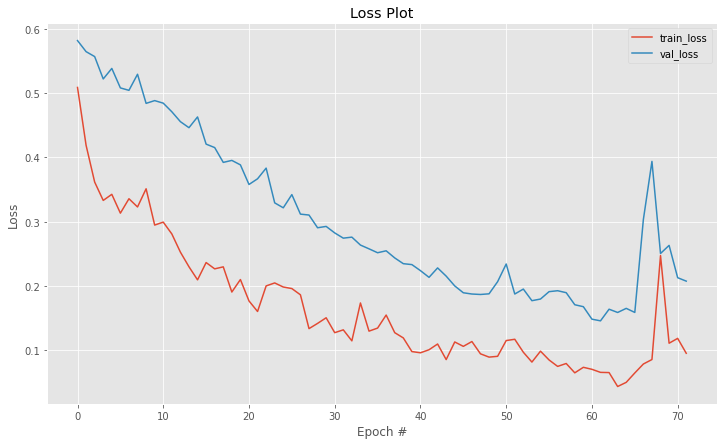

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

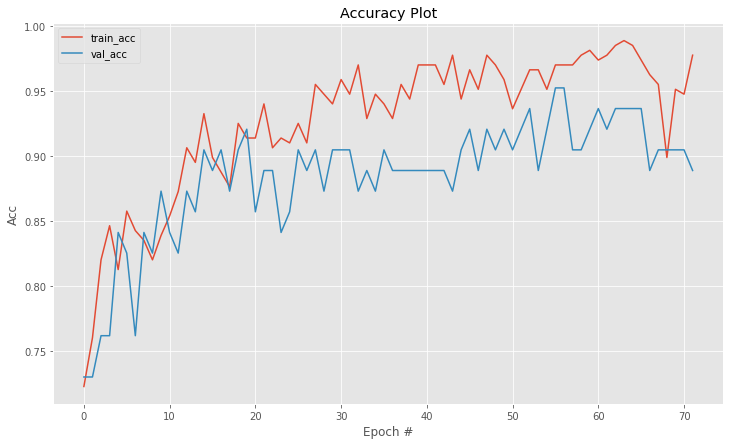

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
score = model_cnn_3.evaluate(test_generator_3)

print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

1/1 [==============================] - 0s 102ms/step - loss: 0.0327 - accuracy: 1.0000
Loss: 0.03
Accuracy: 1.00
